<a href="https://colab.research.google.com/github/Pakhi27/CS307-LAB--Linear-Regression--Advertising-Dataset/blob/main/CS307_LAB_Linear_Regression_Advertising_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
dataset=pd.DataFrame(df)

In [4]:
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


<Axes: >

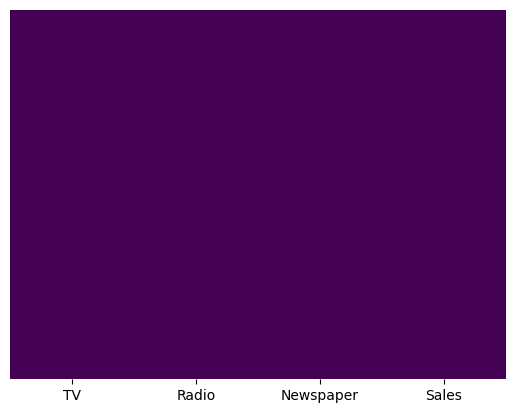

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Exploratory Data Analysis

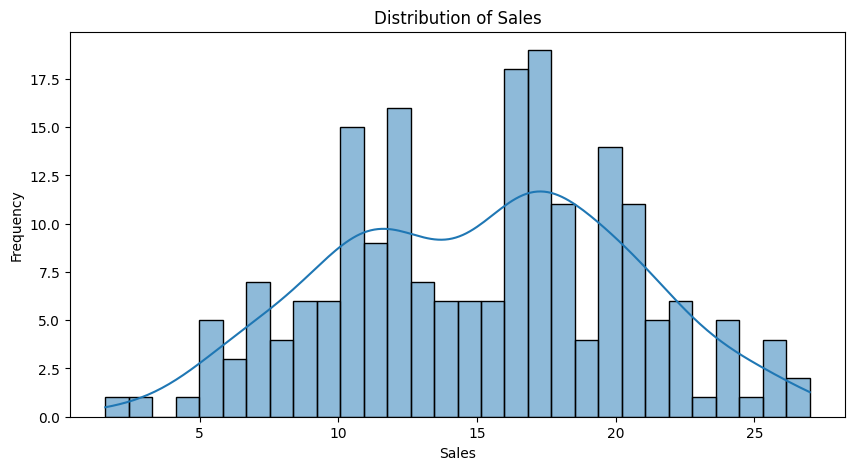

In [7]:
# distr
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

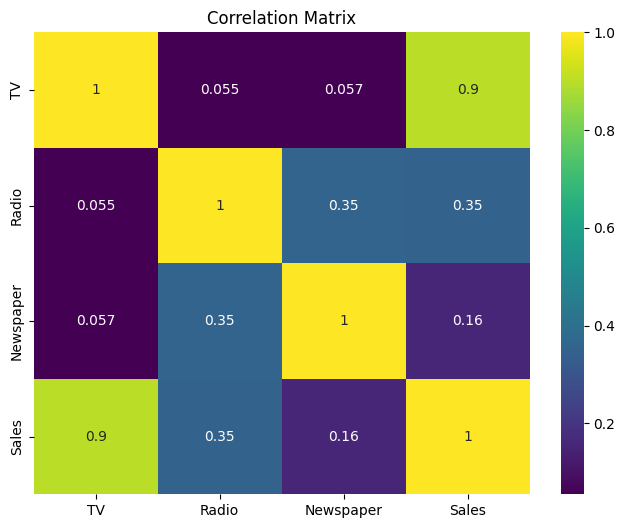

In [8]:
# Correlation matrix-relationship among features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

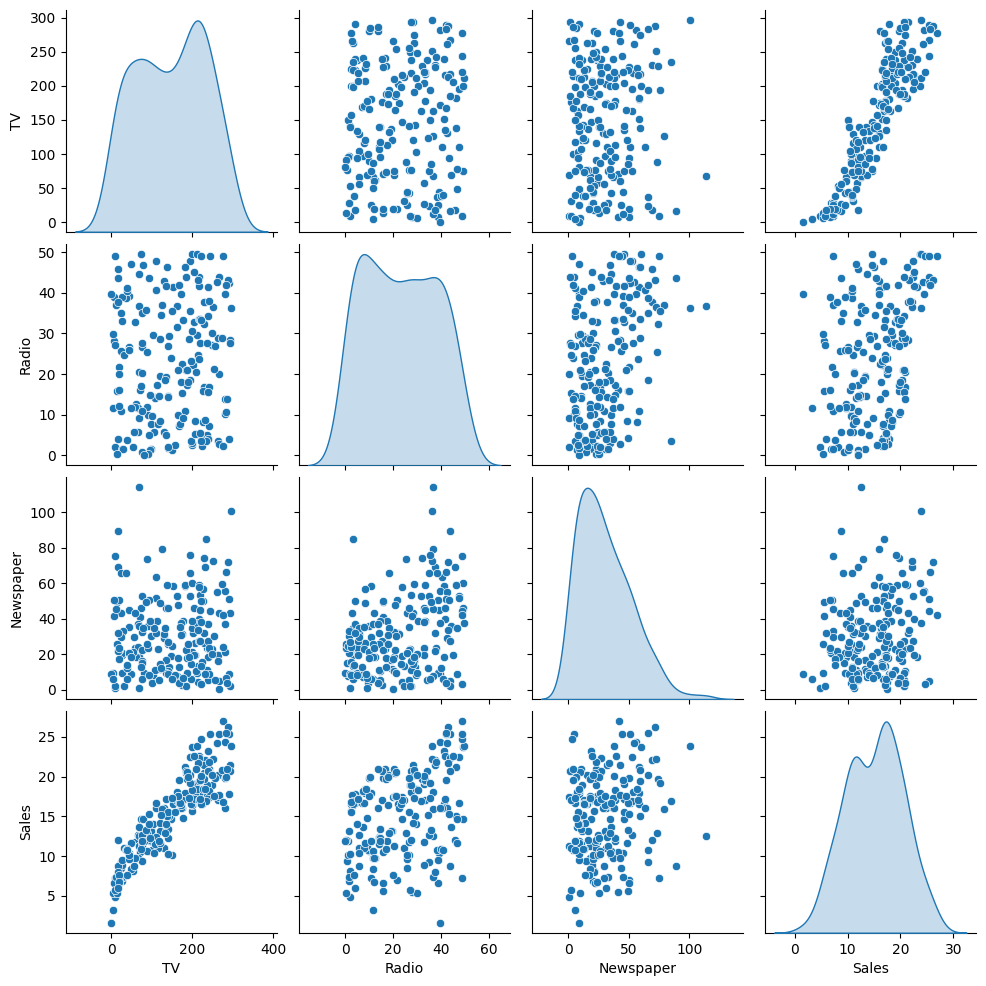

In [9]:
# To explore relationships between all pairs of features:
sns.pairplot(df, diag_kind='kde')
plt.show()

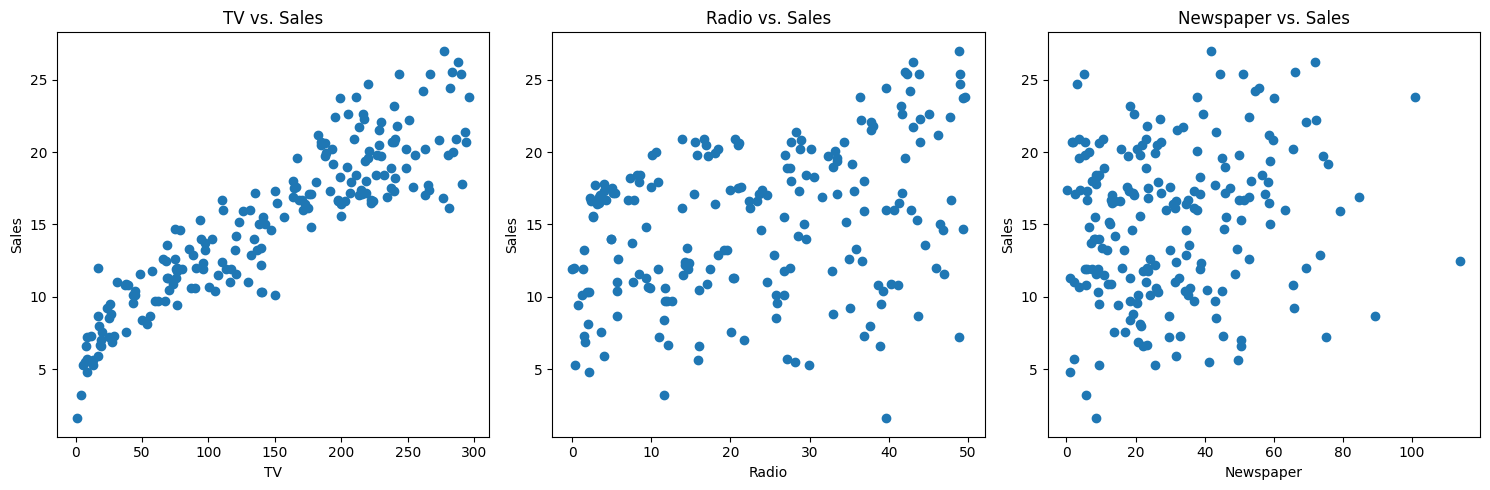

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'])
plt.title('TV vs. Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio vs. Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper vs. Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

In [ ]:
#Linear Regression Model

In [13]:
#Independent and Dependent Features
X=df.drop(['Sales'],axis=1)
y=df['Sales']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
X_train

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [16]:
X_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [17]:
y_train

,Sales
169,20.0
97,20.5
31,11.9
12,9.2
35,17.8
...,...
106,7.2
14,19.0
92,19.4
179,17.6


In [18]:
y_test

,Sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7
115,12.6
69,22.3
170,8.4
174,16.5
45,16.1


In [ ]:
# Ordinary Least Squares (OLS) is a method used to estimate the parameters of a linear regression model. It minimizes the sum of the squared residuals (differences between the actual and predicted values).

In [20]:

TV = df['TV'].tolist()
Sales = df['Sales'].tolist()

# Calculate the mean of TV and Sales
mean_TV = sum(TV) / len(TV)
mean_Sales = sum(Sales) / len(Sales)

# Calculate the coefficients b1 and b0

numerator = sum([(TV[i] - mean_TV) * (Sales[i] - mean_Sales) for i in range(len(TV))])
denominator = sum([(TV[i] - mean_TV) ** 2 for i in range(len(TV))])

# b1-slope=summation((xi-x(mean))*(yi-y(mean)))/summation(xi-x(mean)**2)
# b0-intercept=y(mean)-slope(b1)*x(mean)

b1 = numerator / denominator
b0 = mean_Sales - b1 * mean_TV

print(f"Coefficient b1 (slope): {b1}")
print(f"Intercept b0: {b0}")




Coefficient b1 (slope): 0.055464770469558805
Intercept b0: 6.974821488229905


In [21]:
# Make predictions
#y=b0+b1*x
predicted_sales = [b0 + b1 * x for x in TV]


In [22]:
# Add the predicted sales to the DataFrame
df['Predicted_Sales'] = predicted_sales
print("Predicted Sales:", df['Predicted_Sales'].tolist())

Predicted Sales: [19.737265173275386, 9.443003774125271, 7.928815540306316, 15.377734214368063, 17.002851989126135, 7.457364991315067, 10.164045790229537, 13.641686898670873, 7.45181851426811, 18.056682628047753, 10.641042816267742, 18.88310770804418, 8.294883025405404, 12.38263660901189, 18.295181141066855, 17.812637637981695, 10.735332926065992, 22.58260789836375, 10.812983604723374, 15.144782178395918, 19.088327358781548, 20.142157997703166, 7.706956458428081, 19.637428586430183, 10.430276688483419, 21.556509644676915, 14.90073718832986, 20.291912877970972, 20.774456381056137, 10.890634283380756, 23.220452758763678, 13.236794074243093, 12.365997177871021, 21.706264524944725, 12.282800022166683, 23.09843026373065, 21.77836872655515, 11.118039842305947, 9.365353095467889, 19.620789155289312, 18.206437508315563, 16.792085861341814, 23.259278098092373, 18.45048249838162, 8.36698722701583, 16.68670279744965, 11.950011399349329, 20.28081992387706, 19.576417338913664, 10.68541463264339, 18

In [23]:
df

,TV,Radio,Newspaper,Sales,Predicted_Sales
0,230.1,37.8,69.2,22.1,19.737265
1,44.5,39.3,45.1,10.4,9.443004
2,17.2,45.9,69.3,12.0,7.928816
3,151.5,41.3,58.5,16.5,15.377734
4,180.8,10.8,58.4,17.9,17.002852
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,9.093576
196,94.2,4.9,8.1,14.0,12.199603
197,177.0,9.3,6.4,14.8,16.792086
198,283.6,42.0,66.2,25.5,22.704630


In [24]:
# Optional: Calculate R-squared to evaluate the fit
# An R-squared value of 0.8122 (approximately) indicates the proportion of the variance in the dependent variable (in this case, Sales) that is predictable from the independent variable (TV).
# R-squared = 0.8122: This means that 81.22% of the variance in Sales can be explained by the amount spent on TV advertising.
# Good Fit: An R-squared value of 0.8122 suggests that the model explains a large portion of the variability in the Sales data, implying that TV advertising is a strong predictor of sales.
# The R-squared value of 0.8122 is relatively high, indicating that your linear regression model is performing well in explaining the relationship between TV advertising and Sales
# R2=1-((yi-y^)^2/(yi-y(mean))^2)

ss_total = sum([(y - mean_Sales) ** 2 for y in Sales])
ss_residual = sum([(Sales[i] - predicted_sales[i]) ** 2 for i in range(len(Sales))])
r_squared = 1 - (ss_residual / ss_total)

print(f"R-squared: {r_squared}")
# 81.21%

R-squared: 0.8121757029987413


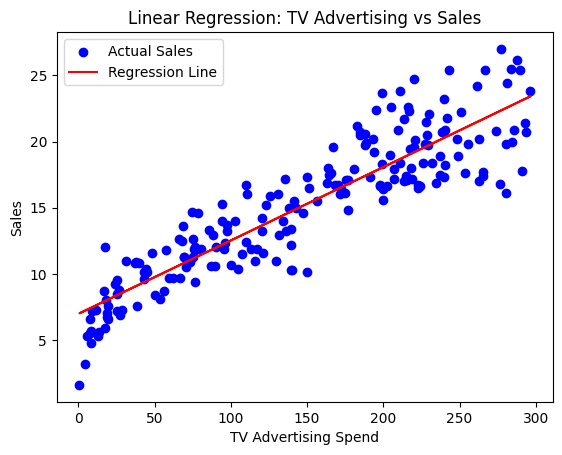

In [29]:
#Plotting the linear regression graphimport matplotlib.pyplot as plt

# Plotting the actual data points
plt.scatter(df['TV'], df['Sales'], color='blue', label='Actual Sales')

# Plotting the regression line
# The regression line is given by the equation y = b0 + b1 * x
x_values = df['TV']
y_values = [b0 + b1 * x for x in x_values]
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Linear Regression: TV Advertising vs Sales')
plt.legend()

# Show the plot
plt.show()
